# 0.0 Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0  Montando e analisando inicialmente o DataFrame

In [2]:
df = pd.read_csv('vgsales.csv').drop(columns=['Rank'])

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- Verificando percentagem de valores nulos

In [7]:
not_nul_pct = list()
for column in df.columns:
    not_nul_pct.append((column, (df[column].count() / df.shape[0]) * 100, df[column].isna().sum())) 

print(*sorted(not_nul_pct, key=lambda x: x[1]), sep='\n')

('Year', 98.36727316544162, 271)
('Publisher', 99.6505603084709, 58)
('Name', 100.0, 0)
('Platform', 100.0, 0)
('Genre', 100.0, 0)
('NA_Sales', 100.0, 0)
('EU_Sales', 100.0, 0)
('JP_Sales', 100.0, 0)
('Other_Sales', 100.0, 0)
('Global_Sales', 100.0, 0)


# 2.0 Analise exploratória e tratamento

## 2.1 Verificando valores nulos

In [8]:
df[df['Year'].isna() | df['Publisher'].isna()][['Name', 'Year', 'Publisher']]

,Name,Year,Publisher
179,Madden NFL 2004,NaN,Electronic Arts
377,FIFA Soccer 2004,NaN,Electronic Arts
431,LEGO Batman: The Videogame,NaN,Warner Bros. Interactive Entertainment
470,wwe Smackdown vs. Raw 2006,NaN,NaN
607,Space Invaders,NaN,Atari
...,...,...,...
16427,Virtua Quest,NaN,Unknown
16493,The Smurfs,NaN,Unknown
16494,Legends of Oz: Dorothy's Return,2014.0,NaN
16543,Driving Simulator 2011,2011.0,NaN


- por falta de acesso a uma API que possa buscar os metadados dos jogos, decidi por remover os valores nulos

In [9]:
df = df.dropna()

- Verificando valores duplicados

In [10]:
df.duplicated().sum()

0

- Sem valores duplicados

### 2.1.1 Processando as variáveis numéricas

In [11]:
sales = list(df.select_dtypes(include='number').columns)
sales.remove('Year')

In [12]:
df[sales] = df[sales].replace({
    0: 0.01
    }
)

In [13]:
df[sales] = df[sales]* 1000000

## 2.2 Verificando os tipos de dados das variáveis.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


- Alterando tipo de dado Year para Inteiro

In [15]:
df = df.astype({
    'Year': int,
    }
)

## 2.3 Verificando distribuição das variáveis numéricas.

In [16]:
numeric_vars = tuple(df.select_dtypes(include='number').columns)

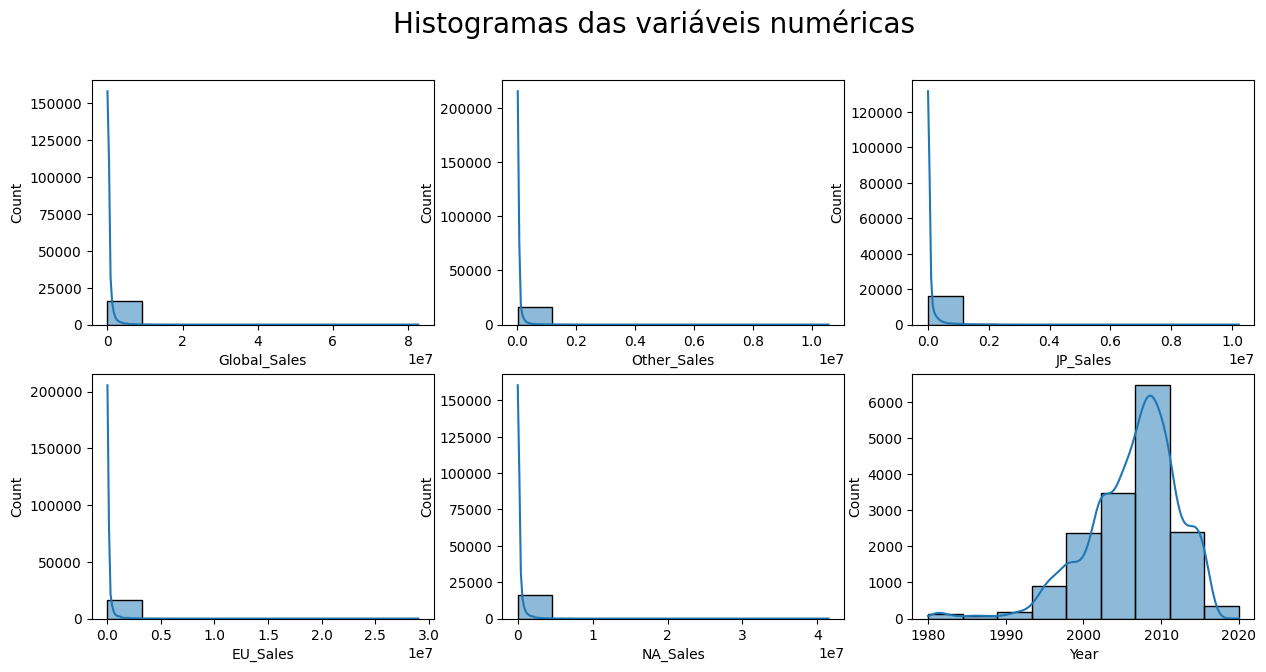

In [17]:
nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 7))

fig.suptitle('Histogramas das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna
            colz = numeric_vars[nv_index]
            
            sns.histplot(data=df, x=colz, bins=9, kde=True, ax=axes[linha, coluna])

            nv_index -= 1
        else:
            plt.axis('off')
plt.show()

- A maioria dos jogos no dataset não venderam muito bem.
- O ano que possui mais lançamentos está próximo de 2010.

- Verificando outliers

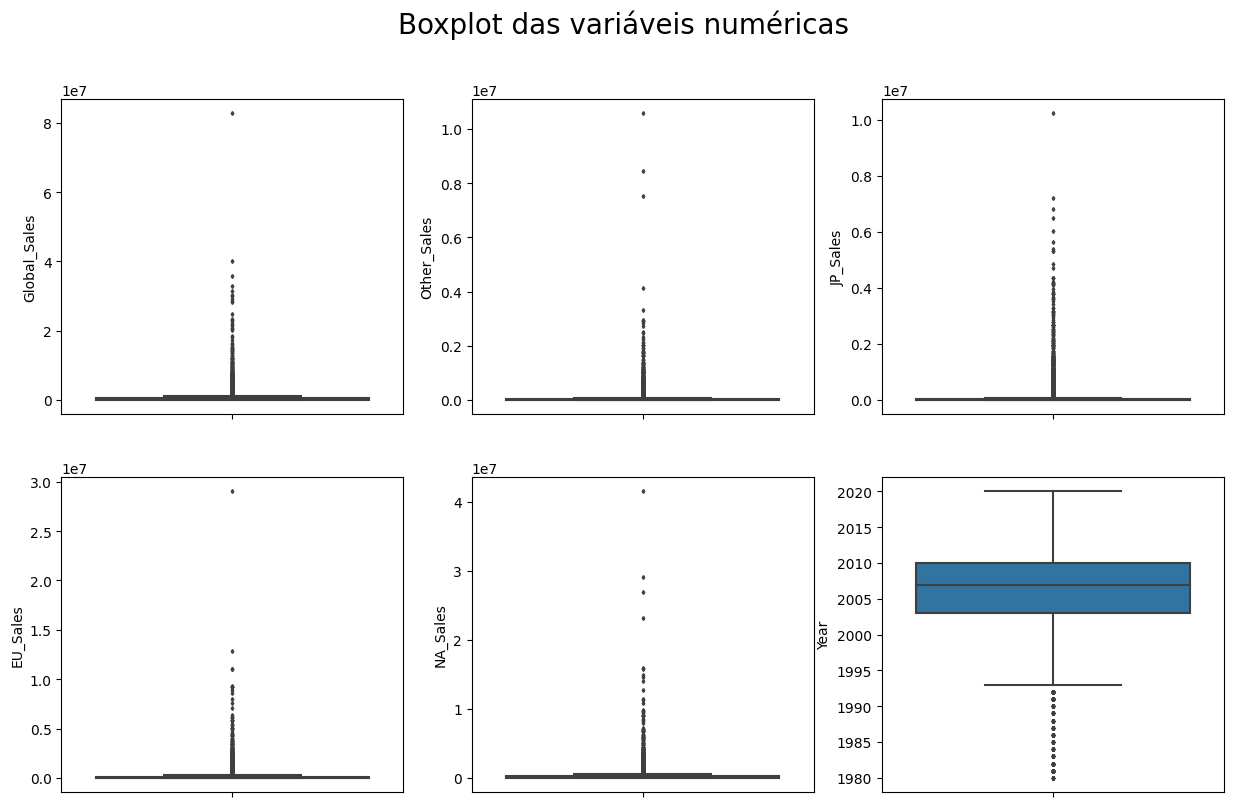

In [18]:
nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 9))

fig.suptitle('Boxplot das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna
            colz = numeric_vars[nv_index]
            
            sns.boxplot(data=df, y=colz, ax=axes[linha, coluna], fliersize=2)
            nv_index -= 1
        else:
            plt.axis('off')
plt.show()


- Existem outliers muito superioes ao intervalo interquartil nas variáveis referentes à vendas, potencialmente referindo-se à jogos que foram extraordináriamente bem vendidos.
- Existem outliers abaixo do intervalo interquatil na variável ano, o que mostra os primóridos da popularização dos jogos eletrônicos.

# 3.0 Análise de contexto das variáveis

## 3.1 Jogos mais vendidos

In [19]:
df.groupby('Name')\
    .agg({
        'Global_Sales': 'sum',
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum'
    })\
    .sort_values('Global_Sales', ascending=False).head(10)

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Wii Sports,82740000.0,41490000.0,29020000.0,3770000.0,8460000.0
Grand Theft Auto V,55920000.0,23460000.0,23040000.0,1410000.0,8030000.0
Super Mario Bros.,45310000.0,32480000.0,4880000.0,6960000.0,990000.0
Tetris,35840000.0,26170000.0,2950000.0,6030000.0,690000.0
Mario Kart Wii,35820000.0,15850000.0,12880000.0,3790000.0,3310000.0
Wii Sports Resort,33000000.0,15750000.0,11010000.0,3280000.0,2960000.0
Pokemon Red/Pokemon Blue,31370000.0,11270000.0,8890000.0,10220000.0,1000000.0
Call of Duty: Modern Warfare 3,30830000.0,15580000.0,11290000.0,640000.0,3350000.0
New Super Mario Bros.,30010000.0,11380000.0,9230000.0,6500000.0,2900000.0


- Wii Sports figura como o jogo mais vendido, seguido de GTA V, em número de vendas.

## 3.2 Plataformas com mais vendas e títulos

In [20]:
df.groupby('Platform')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .rename(columns={
        'Name': 'N_Titles',
        'Global_Sales': 'Total_Sales'
    })\
    .sort_values('Total_Sales', ascending=False)\
    .head(10)

,N_Titles,Total_Sales
Platform,,
PS2,2127,1.233460e+09
X360,1234,9.696000e+08
PS3,1304,9.493500e+08
Wii,1290,9.098100e+08
DS,2131,8.189100e+08
PS,1189,7.273900e+08
GBA,786,3.056200e+08
PSP,1197,2.917100e+08
PS4,336,2.781000e+08


- Segundo o dataset, o PlayStation 2 é o videogame mais rentável e que possui mais títulos.

## 3.3 Gênero preferido

In [21]:
df.groupby('Genre')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .rename(columns={
        'Name': 'N_Titles',
        'Global_Sales': 'Sales'
    })\
    .sort_values('Sales', ascending=False)\
    .head(10)

,N_Titles,Sales
Genre,,
Action,3251,1.722840e+09
Sports,2304,1.309240e+09
Shooter,1282,1.026200e+09
Role-Playing,1470,9.238300e+08
Platform,875,8.291300e+08
Misc,1686,7.898700e+08
Racing,1225,7.267600e+08
Fighting,836,4.440500e+08
Simulation,848,3.899800e+08


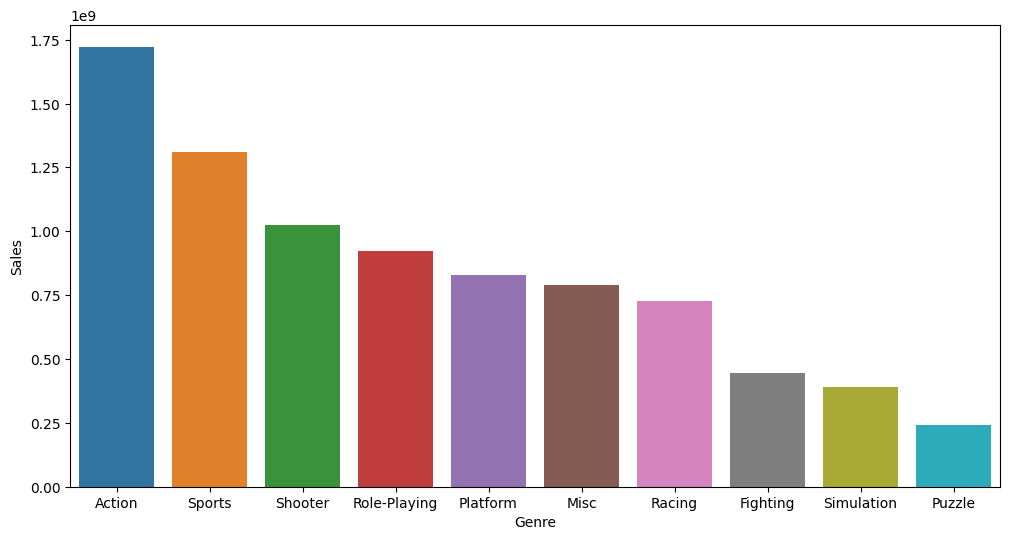

In [22]:
plt.figure(figsize=(12,6))

sns.barplot(data=df.groupby('Genre')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .rename(columns={
        'Name': 'N_Titles',
        'Global_Sales': 'Sales'
    })\
    .sort_values('Sales', ascending=False)\
    .head(10).reset_index(), y='Sales', x='Genre')

plt.show()

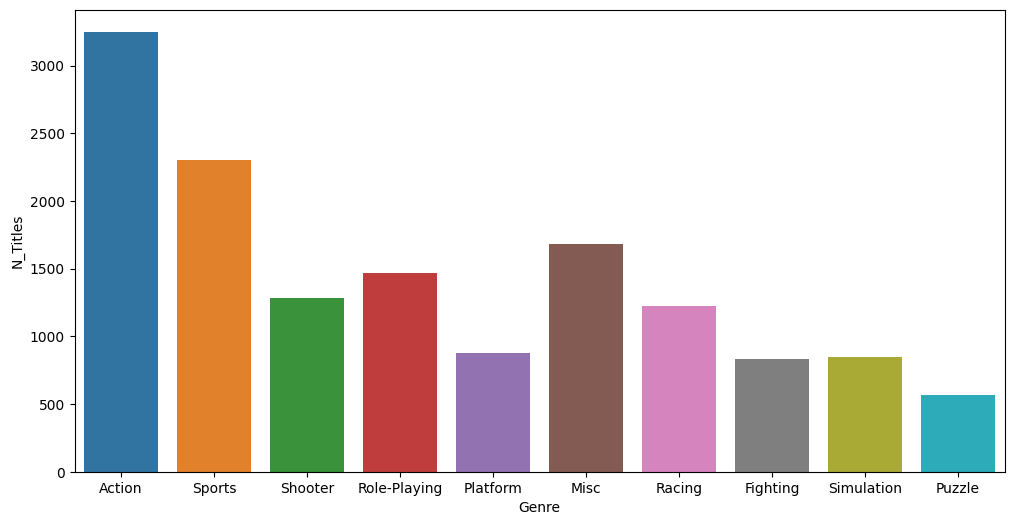

In [23]:
plt.figure(figsize=(12,6))

sns.barplot(data=df.groupby('Genre')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .rename(columns={
        'Name': 'N_Titles',
        'Global_Sales': 'Sales'
    })\
    .sort_values('Sales', ascending=False)\
    .head(10).reset_index(), y='N_Titles', x='Genre')

plt.show()

- Os jogos de ação são os mais vendidos e com mais títulos, apesar de ser uma categoria muito representativa e genérica, podendo englobar muitas outras dentro de si.
- A categoria de shooters tem menos títulos que a categoria RPG, no entanto, as vendas dela (Shooters) são maiores.

## 3.4 Quais os anos com mais lançamentos

In [24]:
top_yrs = df.groupby('Year')\
    .agg({
        'Name': 'count'
    })\
    .sort_values('Name', ascending=False)\
    .head(10)\
    .reset_index()
top_yrs

,Year,Name
0,2009,1431
1,2008,1428
2,2010,1257
3,2007,1201
4,2011,1136
5,2006,1008
6,2005,936
7,2002,829
8,2003,775
9,2004,744


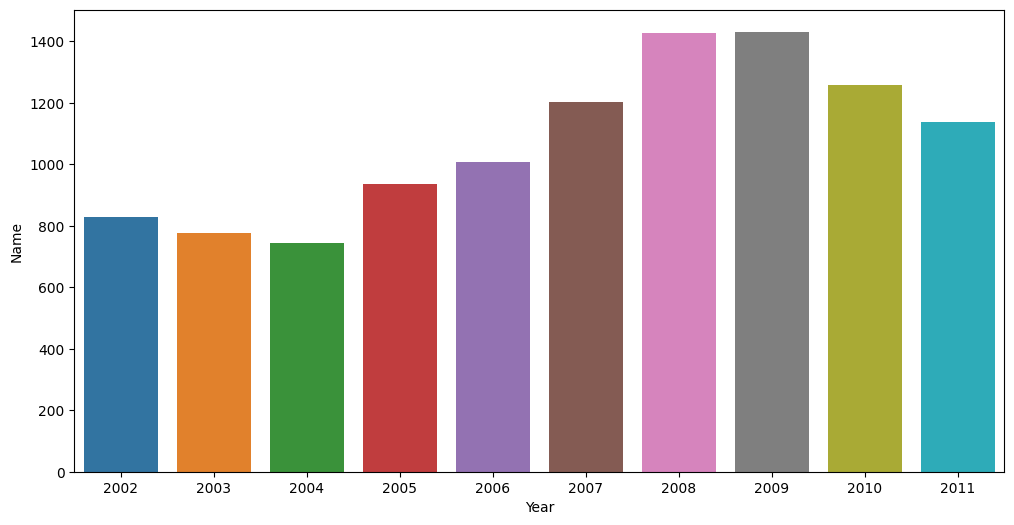

In [25]:
plt.figure(figsize=(12,6))

sns.barplot(data=df.groupby('Year')\
    .agg({
        'Name': 'count'
    })\
    .sort_values('Name', ascending=False)\
    .head(10)\
    .reset_index(), x='Year', y='Name')

plt.show()

- 2009 foi o ano com mais lançamentos

## 3.5 Publishers com mais vendas e mais títulos.

In [26]:
top_pubs = df.groupby('Publisher')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .sort_values(['Global_Sales', 'Name'], ascending=False)\
    .head(10)\
    .rename(columns={
        'Name': 'Title_Count',
        'Global_Sales': 'Total_Sales'
    })
top_pubs

,Title_Count,Total_Sales
Publisher,,
Nintendo,696,1.784430e+09
Electronic Arts,1339,1.093390e+09
Activision,966,7.214100e+08
Sony Computer Entertainment,682,6.072800e+08
Ubisoft,918,4.735400e+08
Take-Two Interactive,412,3.993000e+08
THQ,712,3.404400e+08
Konami Digital Entertainment,823,2.785600e+08
Sega,632,2.707000e+08


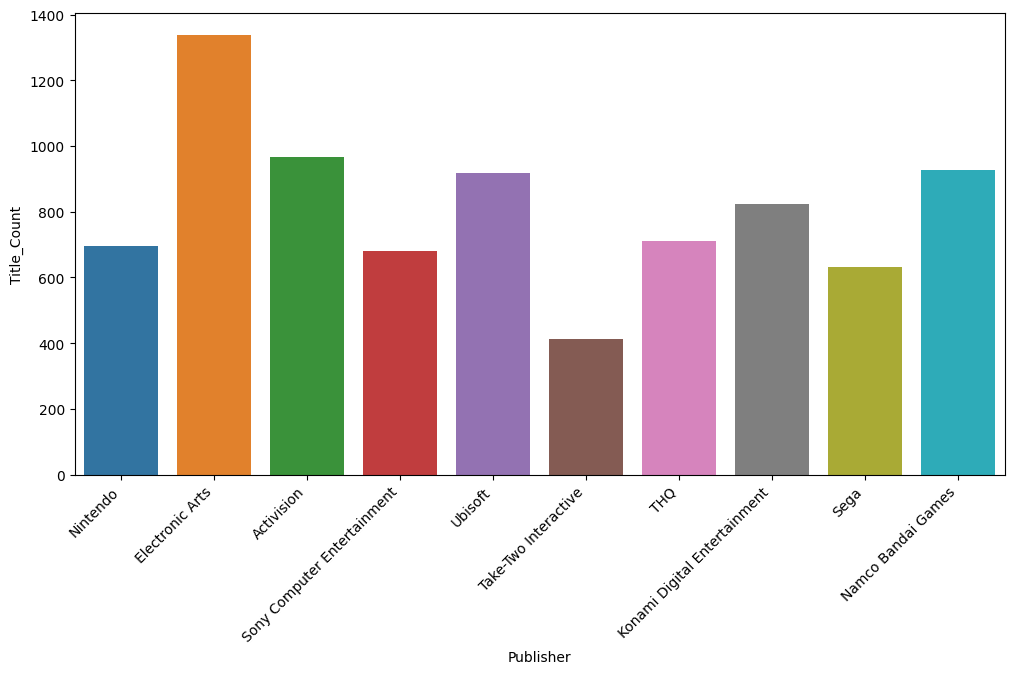

In [27]:
plt.figure(figsize=(12,6))

plot = sns.barplot(data=df.groupby('Publisher')\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .sort_values(['Global_Sales', 'Name'], ascending=False)\
    .head(10)\
    .rename(columns={
        'Name': 'Title_Count',
        'Global_Sales': 'Total_Sales'
    })\
    .reset_index(), x='Publisher', y='Title_Count', )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



In [28]:
pubs_yr = df.groupby(['Publisher', 'Year'])\
    .agg({
        'Name': 'count',
        'Global_Sales': 'sum'
    })\
    .sort_values(['Global_Sales', 'Name'], ascending=False)\
    .rename(columns={
        'Name': 'Title_Count',
        'Global_Sales': 'Total_Sales'
    }).reset_index()

pubs_yr[pubs_yr['Year'].isin(top_yrs['Year'][:5]) & pubs_yr['Publisher'].isin(top_pubs.index)]\
    .pivot_table(index=['Publisher', 'Year'])
    

Title_Count  Total_Sales
Publisher                    Year                          
Activision                   2007           75   63570000.0
                             2008           88   67410000.0
                             2009          121   78060000.0
                             2010           89   63390000.0
                             2011           75   51740000.0
Electronic Arts              2007          107   71330000.0
                             2008          120   84120000.0
                             2009          112   86200000.0
                             2010           88   81380000.0
                             2011           76   72250000.0
Konami Digital Entertainment 2007           61   17210000.0
                             2008           64   27820000.0
                             2009           59   16090000.0
                             2010           68   18550000.0
                             2011           44   10040000.0
Namco Bandai Games           2007           49    7590000.0
                             2008           52   10900000.0
                             2009           62   16770000.0
                             2010           70   16410000.0
                             2011           76   22080000.0
Nintendo                     2007           42  104180000.0
                             2008           32   91220000.0
                             2009           32  128890000.0
                             2010           28   61070000.0
                             2011           26   51530000.0
Sega                         2007           50   23690000.0
                             2008           67   37190000.0
                             2009           43   24920000.0
                             2010           39   22890000.0
                             2011           35   16790000.0
Sony Computer Entertainment  2007           41   37540000.0
                             2008           37   26640000.0
                             2009           45   36530000.0
                             2010           43   34890000.0
                             2011           36   27400000.0
THQ                          2007           74   33290000.0
                             2008           61   30450000.0
                             2009           72   30830000.0
                             2010           57   22110000.0
                             2011           76   26760000.0
Take-Two Interactive         2007           37   19810000.0
                             2008           41   46180000.0
                             2009           41   19110000.0
                             2010           35   35840000.0
                             2011           31   18030000.0
Ubisoft                      2007           88   48600000.0
                             2008          112   57440000.0
                             2009          102   47010000.0
                             2010           72   42620000.0
                             2011           87   48030000.0